# Analysis and Classification of the quality of wine using Machine Learning Algorithms.

### _Wine quality, as Maynard Amerine once said, is easier to detect than define. <br>This is partially due to quality being primarily subjective, and strongly influenced by extrinsic factors._

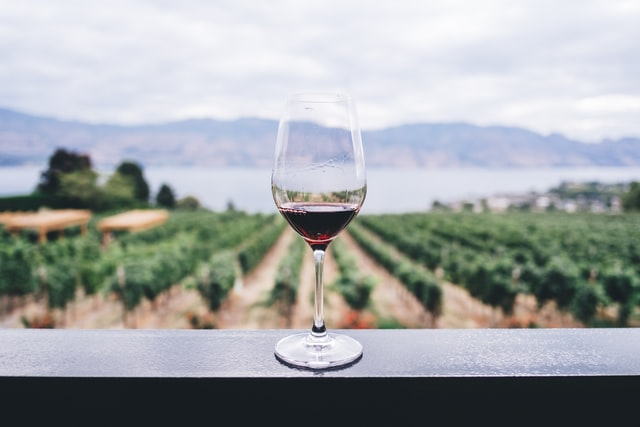

### _Nonetheless, most serious wine connoisseurs tend to agree on what constitutes wine quality, that is, what they subjectively have come to like through extensive tasting. Although disappointingly nebulous, it has still been sufficient to guide grape growers and winemakers in their choice of the procedures they use._

### _Wine quality is the result of a complex set of interactions, which include geological and soil variables, climate, and many variables, climate, and many viticultural decisions_

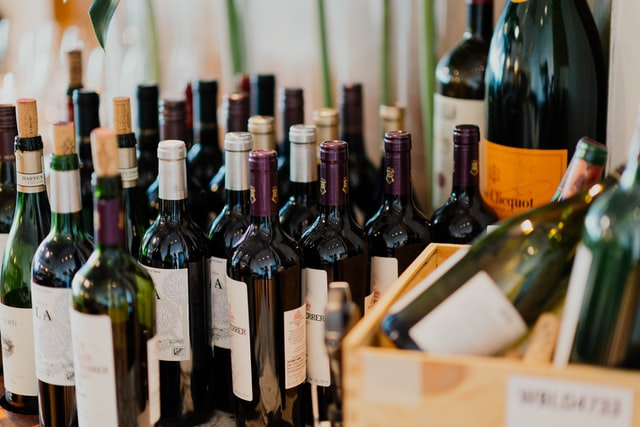

### _What constitutes wine quality is often a reflection of cultural percepts, training, and experience. It is also undoubtedly influenced by the sensory acuity and intention to seriously assess the wine’s attributes.<br><br>Nonetheless, quality does have components, independent of individual tasters, on which there is general agreement. This especially applies to negative factors, such as off-odors. <br>There is less accord on what constitutes positive quality aspects._

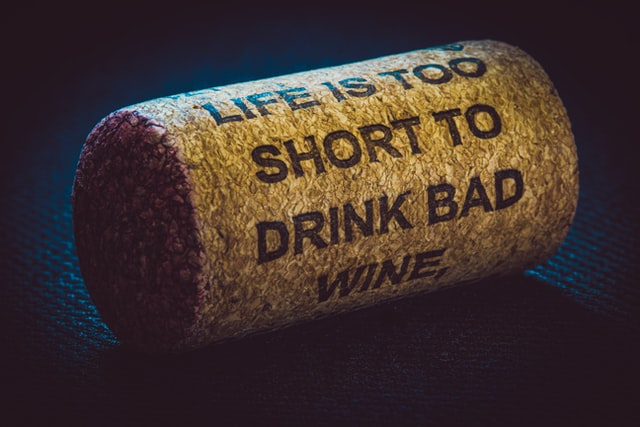

---
---

### _Importing Libraries_

In [1]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### _Reading the dataset_

In [4]:
df = pd.read_csv('wine quality data.csv')

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## _Checking for null values:_

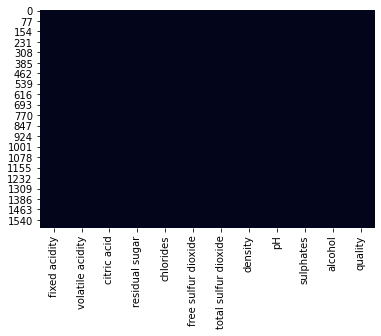

In [6]:
sns.heatmap(df.isnull(), cbar=False)

As it seems, no null values to take care of.

---

## _Exploratory Data Analysis and Visualization:_

In [7]:
df.shape

(1599, 12)

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## _Using correlation for drawing a Heatmap_

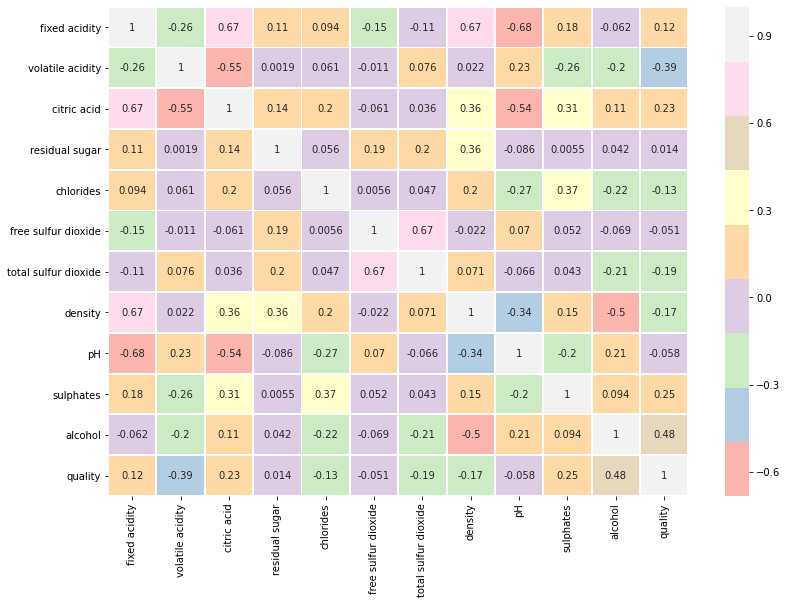

In [13]:
corrmat = df.corr()
corr_features = corrmat.index
plt.figure(figsize=(13,9))
g=sns.heatmap(df[corr_features].corr(),annot=True, linewidth =.9 , cmap="Pastel1")

In [14]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Text(0.5, 1.0, 'Different qualitites of wine provided in this dataset:')

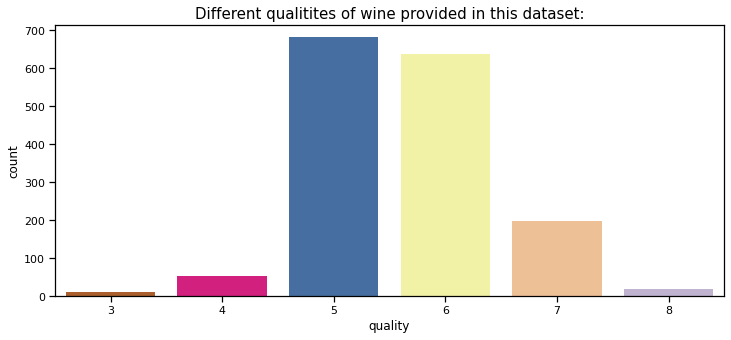

In [27]:
plt.figure(figsize=(12,5))
sns.countplot(x='quality',data=df, palette='Accent_r')
sns.set_context('notebook')
plt.title("Different qualitites of wine provided in this dataset:", size =15)

---
## _Analysing the columns wrt quality standards :_

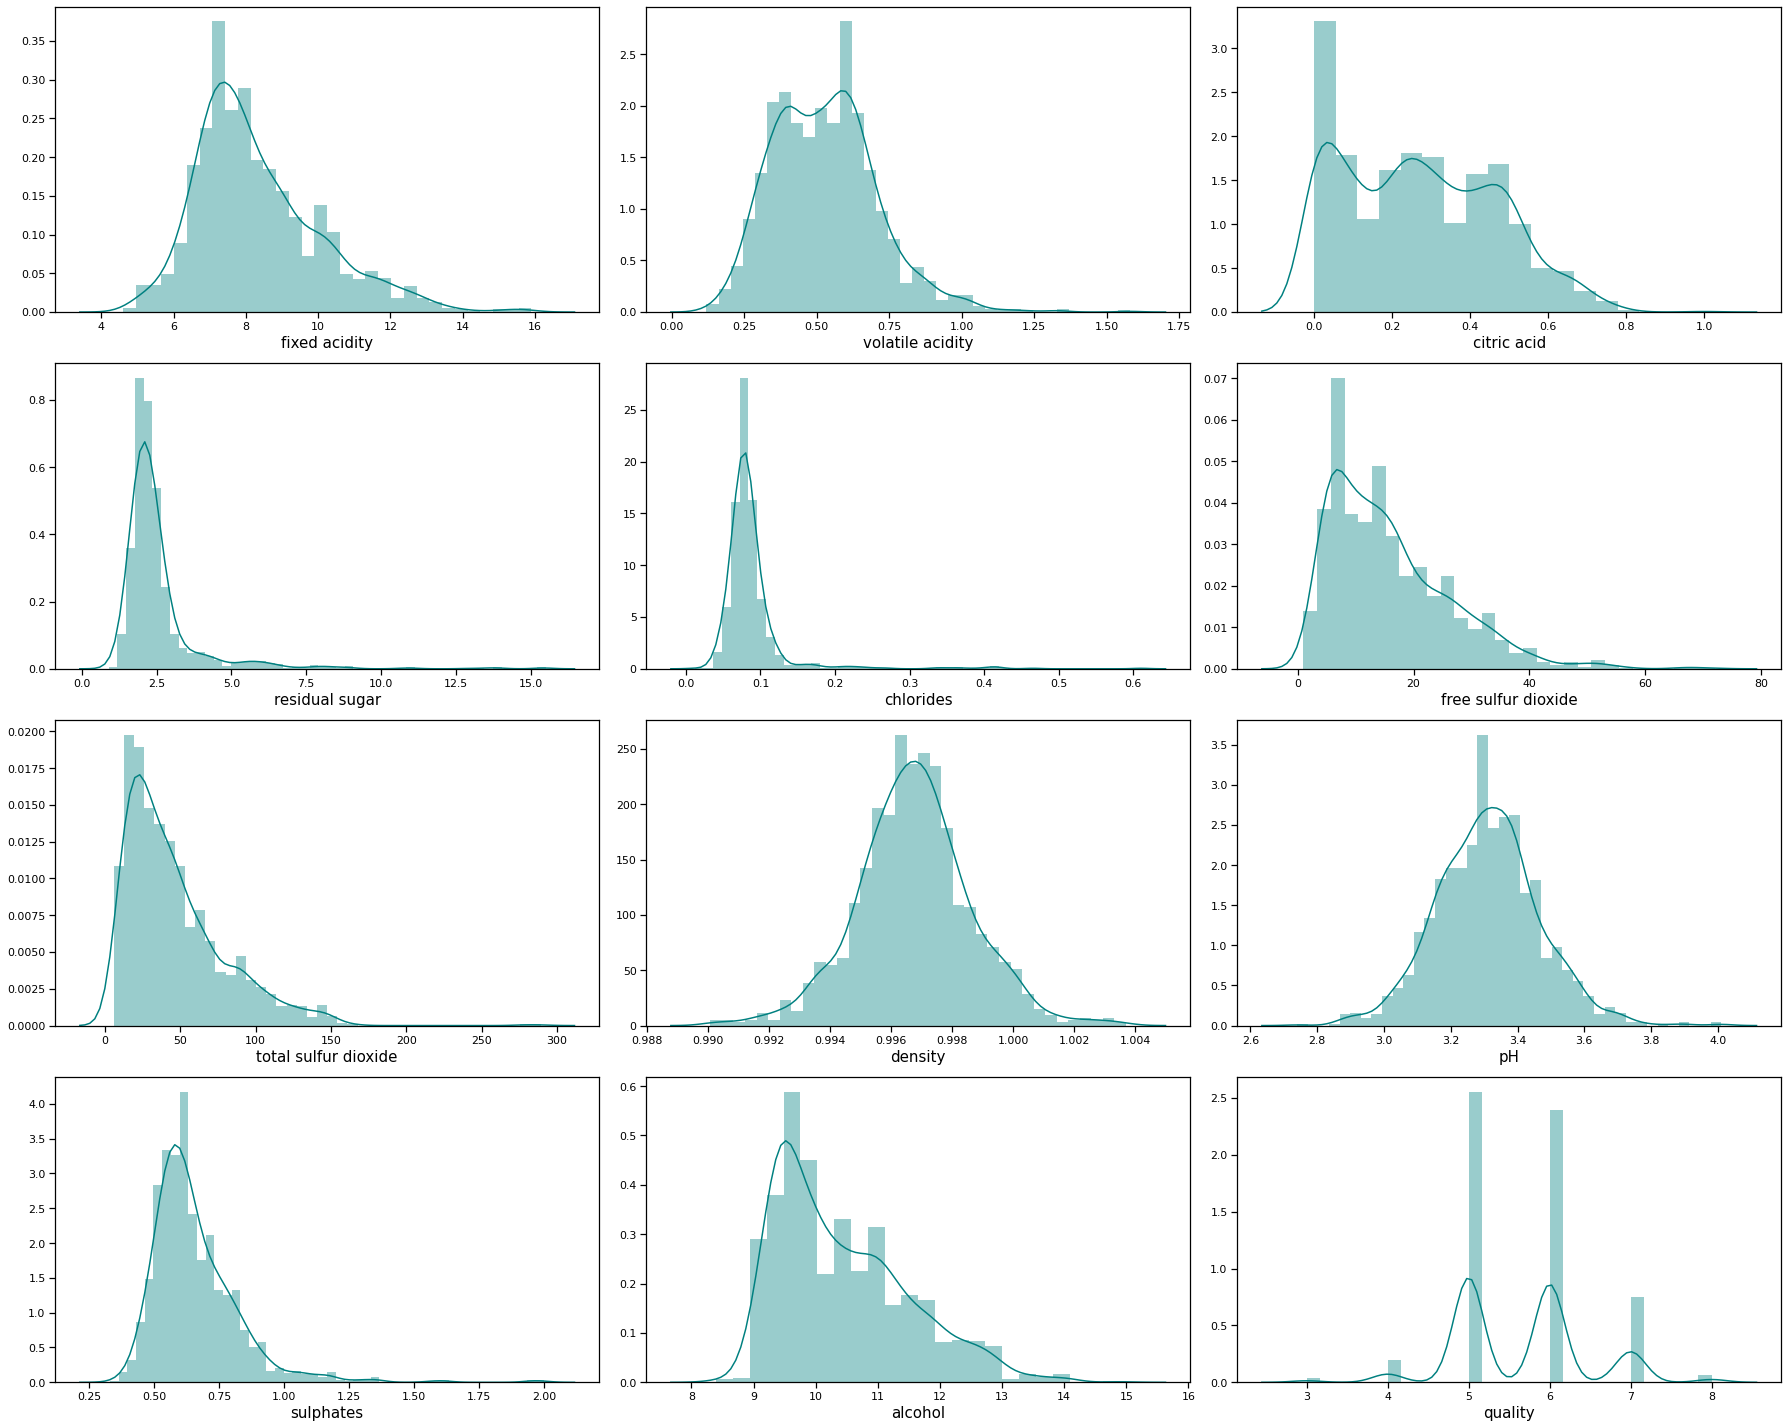

In [31]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in df:
    if plotnumber <= 12:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(df[col], color = 'teal')
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

---
## _Relation between the ph levels of the alcohol:_

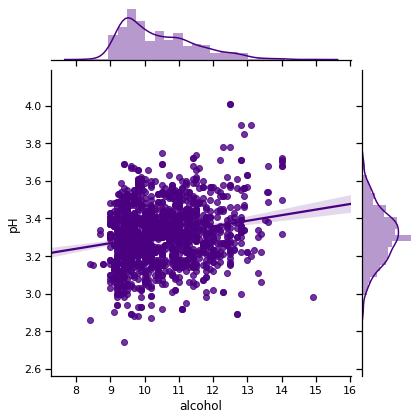

In [42]:
sns.jointplot(x='alcohol',y='pH',data=df, kind='reg', color = 'indigo')

## _Data Preprocessing:_

### _Making Binary Classifications:_

In [44]:
bins = (2, 6.5, 8)
groups = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = groups)

##### Using Label encoder

In [46]:
from sklearn.preprocessing import LabelEncoder
label_quality = LabelEncoder()

In [48]:
df['quality'] = label_quality.fit_transform(df['quality'])

In [49]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

##### Here, 1 - Good Quality wine  <br> and  0 - Bad Quality wine.

---
## _Independent and dependent features:_

In [50]:
X = df.drop('quality', axis = 1)

In [51]:
y = df['quality']

---
---
# Making the Model 

## _Train-Test split:_

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

##### Using Standard Scaler

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
sc = StandardScaler()

In [56]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [57]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [58]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int32

---
# Training the Model :

---
---
# _Using Random Forest Classifier :_

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rf = RandomForestClassifier(n_estimators=200)
rf_model = rf.fit(X_train, y_train)

In [61]:
rf_pred = rf_model.predict(X_test)

### _Accuracy Score of Random forest classifier:_

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [66]:
accuracy_score(y_test, rf_pred)

0.878125

### _Classification report of Random forest classifier:_

In [65]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       273
           1       0.64      0.38      0.48        47

    accuracy                           0.88       320
   macro avg       0.77      0.67      0.71       320
weighted avg       0.86      0.88      0.86       320



### _Confusion Matrix:_

In [67]:
from sklearn.metrics import confusion_matrix

In [68]:
confrf= confusion_matrix(y_test, rf_pred)
confrf

array([[263,  10],
       [ 29,  18]], dtype=int64)

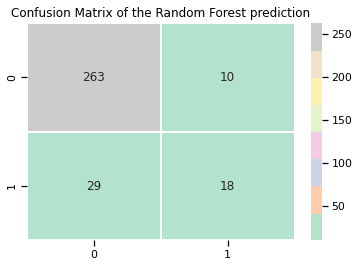

In [69]:
sns.heatmap(confrf, annot=True, cmap="Pastel2", linewidths=.9, fmt='d')
plt.title('Confusion Matrix of the Random Forest prediction')
plt.show()

### _Analyzing the key factors of RandomForest :_

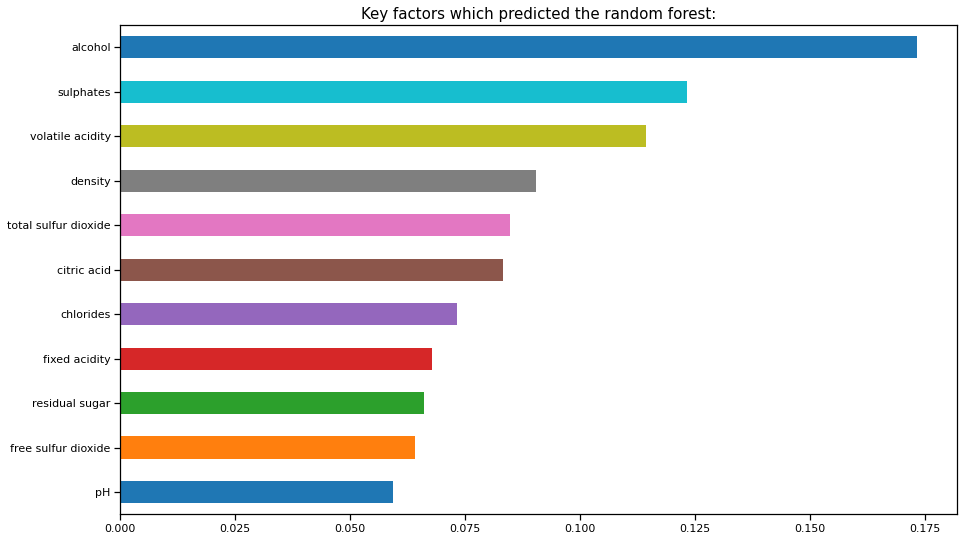

In [74]:
imp = rf.feature_importances_
kfactors = pd.Series(imp,index=X.columns.values)
plt.figure(figsize=(15,9))
plt.title("Key factors which predicted the random forest:", size =15)
kfactors.sort_values().plot(kind = 'barh')

---
---
# _Using Support Vector Machine_
---

In [75]:
from sklearn.svm import SVC

In [76]:
svc = SVC()
svc_model = svc.fit(X_train, y_train)

In [77]:
svc_pred = svc_model.predict(X_test)

### _Accuracy Score of SVM:_

In [78]:
accuracy_score(y_test, svc_pred)

0.875

### _Classification report of SVM:_

In [80]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



### _Confusion matrix SVM:_

In [81]:
confsvm= confusion_matrix(y_test, svc_pred)
confsvm

array([[268,   5],
       [ 35,  12]], dtype=int64)

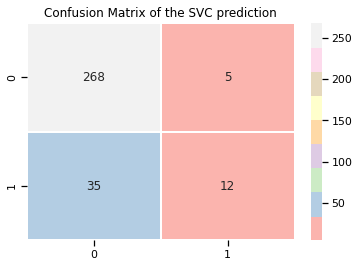

In [82]:
sns.heatmap(confsvm, annot=True, cmap="Pastel1", linewidths=.9, fmt='d')
plt.title('Confusion Matrix of the SVC prediction')
plt.show()

---
---
# _Using K Neighbors Classifier:_ 
---

In [90]:
from sklearn.neighbors import KNeighborsClassifier

In [92]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)

In [93]:
knn_pred = knn_model.predict(X_test)

### _Accuracy of KNN Classifier :_

In [94]:
accuracy_score(y_test, knn_pred)

0.875

### _Classification report of KNN:_

In [95]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       273
           1       0.61      0.40      0.49        47

    accuracy                           0.88       320
   macro avg       0.76      0.68      0.71       320
weighted avg       0.86      0.88      0.86       320



### _Confusion matrix KNN:_

In [96]:
confknn= confusion_matrix(y_test, knn_pred)
confknn

array([[261,  12],
       [ 28,  19]], dtype=int64)

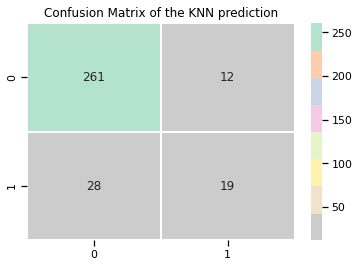

In [98]:
sns.heatmap(confknn, annot=True, cmap="Pastel2_r", linewidths=.9, fmt='d')
plt.title('Confusion Matrix of the KNN prediction')
plt.show()

---
---
---
---
# Conclusion :
### _I have done Analysis as well as visualization of the Dataset.<br><br>And I have Trained the model using:_
- ### _Random Forest Classifier_
- ### _Support Vector Machine_
- ### _K Nearest Classifier_

---

## _And From the above three trained Models, It can be seen that <br><br>the Random Forest Classifier model performed slightly better than <br> SVM and KNN._